<h1 style="color:#2c3f51">Predict the likelihood of a genome sequence undergoing mutation.</h1>

In this notebook, we are going to try EvalML on this Dataset

# 0. Import Labrairies

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

from sklearn.metrics import roc_auc_score

import warnings
warnings.filterwarnings('ignore')

# 1. Loading Data

In [2]:
train = pd.read_csv('../input/devday22-competition-datascience/train.csv')
test = pd.read_csv('../input/devday22-competition-datascience/test.csv')

print('Data Dimension\n')
train.shape, test.shape

Data Dimension



((180000, 32), (120000, 31))

# 2. Understanding Data

- Data describe

In [3]:
train.describe()

,ID,A,B,C,D,E,F,G,H,I,...,M,N,O,P,Q,R,S,T,U,mutation
count,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,...,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000
mean,150259.572350,8.118989,2.632989,0.617833,4.802733,29.696178,1.262467,23.543444,33.423717,1.605150,...,0.516286,0.474217,0.505086,0.501836,0.487837,0.501700,0.487640,0.469766,0.507951,0.264900
std,86591.625009,3.078097,4.147355,1.191218,1.514448,12.700896,2.109440,13.897618,18.991241,2.752459,...,0.214696,0.216486,0.227391,0.241277,0.211201,0.203394,0.178990,0.194466,0.203378,0.441281
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.099276,-0.045316,0.169495,-0.033695,0.005199,0.093056,0.024139,0.215575,0.097789,0.000000
25%,75313.750000,7.000000,0.000000,0.000000,4.000000,33.000000,0.000000,9.000000,19.000000,0.000000,...,0.325804,0.291995,0.279693,0.276133,0.323797,0.353174,0.358795,0.310106,0.367429,0.000000
50%,150321.000000,8.000000,0.000000,0.000000,4.000000,33.000000,0.000000,23.000000,38.000000,0.000000,...,0.471377,0.388573,0.480476,0.554751,0.517962,0.435187,0.410841,0.408567,0.446227,0.000000
75%,225293.250000,10.000000,3.000000,1.000000,5.000000,33.000000,2.000000,35.000000,49.000000,2.000000,...,0.704146,0.645087,0.725755,0.735208,0.607613,0.642035,0.611452,0.587050,0.581691,1.000000
max,299999.000000,14.000000,18.000000,12.000000,19.000000,83.000000,15.000000,50.000000,60.000000,18.000000,...,1.016600,0.951018,0.856975,0.853022,0.960912,1.035818,1.054257,1.005652,1.011331,1.000000


In [4]:
test.describe()

,ID,A,B,C,D,E,F,G,H,I,...,L,M,N,O,P,Q,R,S,T,U
count,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,...,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000
mean,149609.391475,8.127517,2.616475,0.612867,4.811917,29.675250,1.261375,23.459275,33.394692,1.607508,...,0.494413,0.517149,0.474261,0.504490,0.502889,0.488817,0.501796,0.488725,0.469092,0.508648
std,86618.168318,3.060814,4.119720,1.173331,1.520519,12.679975,2.123597,13.852400,19.019033,2.770016,...,0.213312,0.215083,0.216861,0.227599,0.241192,0.211534,0.203650,0.179134,0.194591,0.203416
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.084480,0.094493,-0.031298,0.168071,-0.036379,0.018907,0.090901,0.045832,0.214866,0.126711
25%,74540.750000,7.000000,0.000000,0.000000,4.000000,33.000000,0.000000,9.000000,19.000000,0.000000,...,0.317640,0.326394,0.292660,0.278682,0.276907,0.324116,0.352900,0.359112,0.309691,0.369417
50%,149557.500000,8.000000,0.000000,0.000000,4.000000,33.000000,0.000000,23.000000,38.000000,0.000000,...,0.462719,0.471137,0.385824,0.479183,0.554798,0.518270,0.435730,0.411012,0.405421,0.447079
75%,224504.250000,10.000000,3.000000,1.000000,5.000000,33.000000,2.000000,35.000000,49.000000,2.000000,...,0.695031,0.705315,0.644702,0.725804,0.735256,0.609925,0.641976,0.614888,0.586463,0.582367
max,299992.000000,14.000000,18.000000,12.000000,19.000000,83.000000,15.000000,50.000000,60.000000,18.000000,...,1.005793,1.005743,0.952187,0.858578,0.846413,0.966553,1.027458,1.055885,1.005392,1.006479


- Data info

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180000 entries, 0 to 179999
Data columns (total 32 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   ID         180000 non-null  int64  
 1   sequence1  180000 non-null  object 
 2   sequence2  180000 non-null  object 
 3   sequence3  180000 non-null  object 
 4   sequence4  180000 non-null  object 
 5   sequence5  180000 non-null  object 
 6   sequence6  180000 non-null  object 
 7   sequence7  180000 non-null  object 
 8   sequence8  180000 non-null  object 
 9   sequence9  180000 non-null  object 
 10  A          180000 non-null  int64  
 11  B          180000 non-null  int64  
 12  C          180000 non-null  int64  
 13  D          180000 non-null  int64  
 14  E          180000 non-null  int64  
 15  F          180000 non-null  int64  
 16  G          180000 non-null  int64  
 17  H          180000 non-null  int64  
 18  I          180000 non-null  int64  
 19  J          180000 non-n

In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 31 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   ID         120000 non-null  int64  
 1   sequence1  120000 non-null  object 
 2   sequence2  120000 non-null  object 
 3   sequence3  120000 non-null  object 
 4   sequence4  120000 non-null  object 
 5   sequence5  120000 non-null  object 
 6   sequence6  120000 non-null  object 
 7   sequence7  120000 non-null  object 
 8   sequence8  120000 non-null  object 
 9   sequence9  120000 non-null  object 
 10  A          120000 non-null  int64  
 11  B          120000 non-null  int64  
 12  C          120000 non-null  int64  
 13  D          120000 non-null  int64  
 14  E          120000 non-null  int64  
 15  F          120000 non-null  int64  
 16  G          120000 non-null  int64  
 17  H          120000 non-null  int64  
 18  I          120000 non-null  int64  
 19  J          120000 non-n

- Check missing values

In [7]:
train.isnull().sum().any()

False

In [8]:
test.isnull().sum().any()

False

- Target values

In [9]:
train['mutation'].value_counts()

0    132318
1     47682
Name: mutation, dtype: int64

# 3. EDA

- Training data target label distribution.

<Figure size 500x400 with 0 Axes>

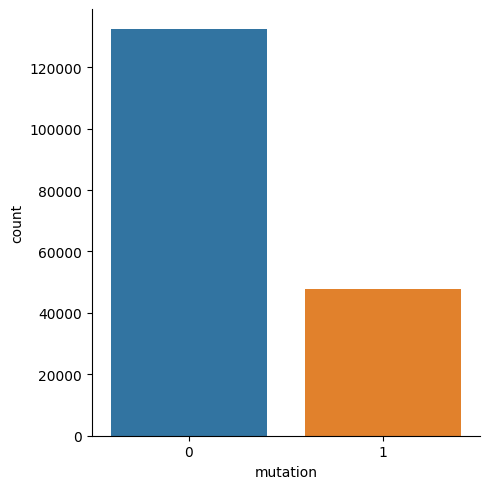

In [10]:
plt.rcParams['figure.dpi'] = 100
fig = plt.figure(figsize=(5, 4), facecolor='#f6f5f5')
background_color = "#dcdada"
fig = sns.catplot(x="mutation",data=train, kind="count")

# 4. Label encode

We are going to encode objects columns

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

Object columns selection

In [12]:
obj_cols = [col for col in train.columns if train[col].dtype == 'object']
obj_cols

['sequence1',
 'sequence2',
 'sequence3',
 'sequence4',
 'sequence5',
 'sequence6',
 'sequence7',
 'sequence8',
 'sequence9']

Encoding label

In [13]:
for col in obj_cols:
    train[col] = le.fit_transform(train[col])
    test[col] = le.transform(test[col])

# 5. Split Data

In [14]:
# training Data
X = train.drop(['ID','mutation'], axis=1)
y = train['mutation']

# Test data
test = test.drop(['ID'], axis=1)

X.shape, test.shape

((180000, 30), (120000, 30))

In [15]:
from sklearn.model_selection import train_test_split
_, X_test, _, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Free the memory

In [16]:
import gc

del train, le, obj_cols
gc.collect()

149

# 6. Modeling with EvalML

- Installing EvalML

[Check the docs here...](https://evalml.alteryx.com/en/stable/user_guide/automl.html)

In [17]:
!python3 -m pip install -q evalml==0.28.0

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
beatrix-jupyterlab 3.1.7 requires google-cloud-bigquery-storage, which is not installed.
tfx-bsl 1.7.0 requires pyarrow<6,>=1, but you have pyarrow 7.0.0 which is incompatible.
tfx-bsl 1.7.0 requires tensorflow!=2.0.*,!=2.1.*,!=2.2.*,!=2.3.*,!=2.4.*,!=2.5.*,!=2.6.*,!=2.7.*,<3,>=1.15.5, but you have tensorflow 2.6.3 which is incompatible.
tensorflow-transform 1.7.0 requires pyarrow<6,>=1, but you have pyarrow 7.0.0 which is incompatible.
tensorflow-transform 1.7.0 requires tensorflow!=2.0.*,!=2.1.*,!=2.2.*,!=2.3.*,!=2.4.*,!=2.5.*,!=2.6.*,!=2.7.*,<2.9,>=1.15.5, but you have tensorflow 2.6.3 which is incompatible.
preprocessing 0.1.13 requires nltk==3.2.4, but you have nltk 3.7 which is incompatible.
pdpbox 0.2.1 requires matplotlib==3.1.1, but you have matplotlib 3.5.1 which is incompatible.
mxnet 1.9.0 requires gra

In [18]:
from evalml.automl import AutoMLSearch

### Training

In [19]:
# run model
model_evalml = AutoMLSearch(X_train=X, y_train=y, problem_type='binary', max_time=3600) # 60 minutes
model_evalml.search()

Generating pipelines to search over...


8 pipelines ready for search.

*****************************
* Beginning pipeline search *
*****************************

Optimizing for Log Loss Binary. 
Lower score is better.

Using SequentialEngine to train and score pipelines.
Will stop searching for new pipelines after 3600 seconds.

Allowed model families: linear_model, decision_tree, lightgbm, catboost, xgboost, random_forest, extra_trees



FigureWidget({
    'data': [{'mode': 'lines+markers',
              'name': 'Best Score',
              'type'…

Evaluating Baseline Pipeline: Mode Baseline Binary Classification Pipeline
Mode Baseline Binary Classification Pipeline:
	Starting cross validation
	Finished cross validation - mean Log Loss Binary: 9.161

*****************************
* Evaluating Batch Number 1 *
*****************************

Elastic Net Classifier w/ Imputer + Standard Scaler:
	Starting cross validation
	Finished cross validation - mean Log Loss Binary: 0.388
Decision Tree Classifier w/ Imputer:
	Starting cross validation
	Finished cross validation - mean Log Loss Binary: 0.430
Random Forest Classifier w/ Imputer:
	Starting cross validation
	Finished cross validation - mean Log Loss Binary: 0.387
LightGBM Classifier w/ Imputer:
	Starting cross validation
	Finished cross validation - mean Log Loss Binary: 0.362
Logistic Regression Classifier w/ Imputer + Standard Scaler:
	Starting cross validation
	Finished cross validation - mean Log Loss Binary: 0.388
XGBoost Classifier w/ Imputer:
	Starting cross validation
	Fini

### Leaderboard

In [20]:
# check leaderboard
model_evalml.rankings

,id,pipeline_name,search_order,mean_cv_score,standard_deviation_cv_score,validation_score,percent_better_than_baseline,high_variance_cv,parameters
0,6,XGBoost Classifier w/ Imputer,6,0.361654,NaN,0.361654,96.052227,False,{'Imputer': {'categorical_impute_strategy': 'm...
6,4,LightGBM Classifier w/ Imputer,4,0.362205,NaN,0.362205,96.046217,False,{'Imputer': {'categorical_impute_strategy': 'm...
7,127,CatBoost Classifier w/ Imputer,127,0.364747,NaN,0.364747,96.018463,False,{'Imputer': {'categorical_impute_strategy': 'm...
50,60,Random Forest Classifier w/ Imputer,60,0.371137,NaN,0.371137,95.948708,False,{'Imputer': {'categorical_impute_strategy': 'm...
80,238,Extra Trees Classifier w/ Imputer,238,0.383244,NaN,0.383244,95.816555,False,{'Imputer': {'categorical_impute_strategy': 'm...
98,28,Elastic Net Classifier w/ Imputer + Standard S...,28,0.388279,NaN,0.388279,95.761596,False,{'Imputer': {'categorical_impute_strategy': 'm...
100,33,Logistic Regression Classifier w/ Imputer + St...,33,0.388279,NaN,0.388279,95.761595,False,{'Imputer': {'categorical_impute_strategy': 'm...
191,82,Decision Tree Classifier w/ Imputer,82,0.410528,NaN,0.410528,95.518728,False,{'Imputer': {'categorical_impute_strategy': 'm...
260,0,Mode Baseline Binary Classification Pipeline,0,9.160963,NaN,9.160963,0.000000,False,{'Baseline Classifier': {'strategy': 'mode'}}


In [21]:
from sklearn.metrics import roc_auc_score

### Evaluate Model

In [22]:
pred = model_evalml.best_pipeline.predict_proba(X_test)[True]

print("Roc : %.7f" % roc_auc_score(y_test, pred))

Roc : 0.9012175


# 7. Make a Test Prediction

In [23]:
## generate predictions
y_predict = model_evalml.best_pipeline.predict_proba(test)[True]

len(y_predict)

120000

# 8. Submission

- Load Submission data

In [24]:
submission = pd.read_csv('../input/devday22-competition-datascience/sample_submission.csv')
submission.head()

,ID,mutation
0,1,0.5
1,3,0.5
2,4,0.5
3,6,0.5
4,8,0.5


In [25]:
!pip install pandas -U
import pandas as pd

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 56.1 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.2.4
    Uninstalling pandas-1.2.4:
      Successfully uninstalled pandas-1.2.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
beatrix-jupyterlab 3.1.7 requires google-cloud-bigquery-storage, which is not installed.
woodwork 0.4.2 requires pandas<1.2.5,>=1.2.0, but you have pandas 1.3.5 which is incompatible.
tfx-bsl 1.7.0 requires pyarrow<6,>=1, but you have pyarrow 7.0.0 which is incompatible.
tfx-bsl 1.7.0 requires tensorflow!=2.0.*,!=2.1.*,!=2.2.*,!=2.3.*,!=2.4.*,!=2.5.*,!=2.6.*,!=2.7.*,<3,>=1.15.5, but you have tensorflow 2.6.3 which is incompatible.
tensorflow-transform 1.7.0 requires pyarrow<6,>=1, but you have pyarrow 7.0.0 which is incompatible.
tensorflow-transform 1.7.0 requires tensorflow!=2.0.*,!=

- Save submission

In [26]:
submission['mutation'] = y_predict
submission.to_csv('submission.csv', index=False)
submission

,ID,mutation
0,1,0.311695
1,3,0.087056
2,4,0.275087
3,6,0.341762
4,8,0.035551
...,...,...
119995,299983,0.146516
119996,299984,0.759269
119997,299990,0.658605
119998,299991,0.040050


<center>
    <h2 style="color:#2c3f51">Thanks for reading...</h2>